In [ ]:
import pandas as pd
import ast
import numpy as np
import matplotlib.pyplot as plt

from datetime import datetime
from datasets import load_dataset

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda date: ast.literal_eval(date) if pd.notna(date) else date)

In [ ]:
df_skills = df.copy()
df_skills = df_skills.explode('job_skills')
skills_count = df_skills.groupby(['job_skills', 'job_title_short']).size()
df_skills_count = skills_count.reset_index(name='skill_count')
df_skills_count.sort_values(by='skill_count', ascending=False, inplace=True)

df_skills_count

In [ ]:
job_titles = ['Data Engineer', 'Data Scientist', 'Data Analyst']

fig, ax = plt.subplots(3, 1)

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_count[df_skills_count['job_title_short'] == job_title].head()
    df_plot.plot(kind='barh', x='job_skills', y='skill_count', ax=ax[i], title=job_title)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)
    ax[i].set_xlim(0, 120000)

fig.suptitle('Counts of Top 5 Skills in Job Postings', fontsize=15)
fig.tight_layout()


## Practice Problems

## Subplots with Bar Charts
Create a subplot with 2 rows and 1 column:

In the first subplot, plot a bar chart of the top 3 job locations by the number of job postings.
In the second subplot, plot a horizontal bar chart of the top 3 job titles by the number of job postings.
Use tight_layout() to adjust the spacing between subplots.

In [ ]:
fig, ax = plt.subplots(2, 1)

job_locations = df['job_location'].value_counts().head(3)
ax[0].bar(job_locations.index, job_locations.values)
ax[0].set_title('Top 3 Locations')

job_title = df['job_title_short'].value_counts().head(3)
ax[1].barh(job_title.index, job_title.values)
ax[1].invert_yaxis()
ax[1].set_title('Top 3 Job Titles')

fig.tight_layout()


## Subplots with Job Titles by Schedule
Create a subplot with 2 rows and 2 columns:

In each subplot, plot a bar chart of the top 3 job titles by the number of job postings for each job schedule type (Full-time, Part-time, Contractor, and Internship).
Use fig.tight_layout() to adjust the spacing between subplots.

In [ ]:
fig, ax = plt.subplots(2, 2)

schedules = ['Full-time', 'Part-time', 'Contractor', 'Internship']

for i, schedule in enumerate(schedules):
    df_schedule = df[df['job_schedule_type'] == schedule]
    job_titles = df_schedule['job_title_short'].value_counts().head(3)
    ax[i//2, i%2].bar(job_titles.index, job_titles.values)
    ax[i//2, i%2].set_title(f'Top 3 Job Titles ({schedule})')
    
fig.tight_layout()
plt.show()

## Top Skills for Job Roles Subplots
Create a subplot with 3 rows and 1 column:

In each subplot, plot a horizontal bar chart of the top 3 job skills by the number of job postings for each job title (Senior Data Scientist, Senior Data Engineer, and Senior Data Analyst).
Use fig.tight_layout() to adjust the spacing between subplots and invert_yaxis() to invert the y-axis in each subplot.

In [ ]:
job_titles = ['Senior Data Scientist', 'Senior Data Engineer', 'Senior Data Analyst']
df_skills = df.explode('job_skills')

fig, ax = plt.subplots(len(job_titles), 1)
for i, title in enumerate(job_titles):
    role_skills = df_skills[df_skills['job_title_short'] == title]['job_skills'].value_counts().head(3)
    ax[i].barh(role_skills.index, role_skills.values)
    ax[i].set_title(title)
    ax[i].set_xlabel('Count')
    ax[i].set_ylabel('')
    ax[i].invert_yaxis()

fig.tight_layout()
plt.show()

## Extra Practice

## Subplots with Bar Charts
Create a subplot with 2 rows and 1 column:

In the first subplot, plot a bar chart of the top 3 job locations by the number of job postings.
In the second subplot, plot a horizontal bar chart of the top 3 job titles by the number of job postings.
Use tight_layout() to adjust the spacing between subplots.

## Subplots with Job Titles by Schedule
Create a subplot with 2 rows and 2 columns:

In each subplot, plot a bar chart of the top 3 job titles by the number of job postings for each job schedule type (Full-time, Part-time, Contractor, and Internship).
Use fig.tight_layout() to adjust the spacing between subplots.

## Top Skills for Job Roles Subplots
Create a subplot with 3 rows and 1 column:

In each subplot, plot a horizontal bar chart of the top 3 job skills by the number of job postings for each job title (Senior Data Scientist, Senior Data Engineer, and Senior Data Analyst).
Use fig.tight_layout() to adjust the spacing between subplots and invert_yaxis() to invert the y-axis in each subplot.

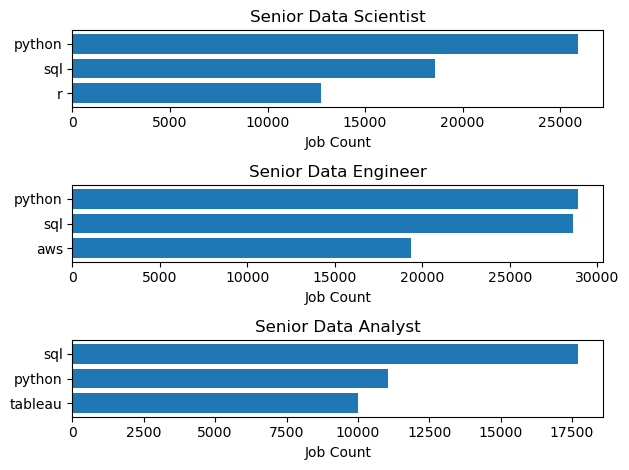

In [13]:
job_titles = ['Senior Data Scientist', 'Senior Data Engineer', 'Senior Data Analyst']
fig, ax = plt.subplots(3, 1)
df_exploded = df.explode('job_skills')

for i, title in enumerate(job_titles):
    job_skills = df_exploded[df_exploded['job_title_short'] == title]['job_skills'].value_counts().head(3)
    ax[i].barh(job_skills.index, job_skills.values)
    ax[i].set_title(title)
    ax[i].set_xlabel('Job Count')
    ax[i].set_ylabel('')
    ax[i].invert_yaxis()

fig.tight_layout()
plt.show()    
